In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold # for Cross Validation
from sklearn.preprocessing import MinMaxScaler
# Install TensorFlow
import tensorflow as tf
import itertools

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

In [4]:
def organization(filepath, files):
    ValsList = []
    for f in files:
        df = pd.read_csv(filepath+f)
        #Displays all rows of printed dataframe so I can decide on a threshold velocity 
        pd.set_option('display.max_rows', None)    
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.max_colwidth', -1)

        #SteadyState = pd.read_csv("~/Desktop/Randles ML Research/1.0 mm Steady.csv", encoding = "ISO-8859-1")

        #Names the columns so I can work with them easier
        df.rename(columns = {list(df)[0]: 'label'}, inplace = True)
        df.rename(columns = {list(df)[1]: 'xpos'}, inplace = True)
        df.rename(columns = {list(df)[2]: 'ypos'}, inplace = True)
        df.rename(columns = {list(df)[3]: 'zpos'}, inplace = True)
        df.rename(columns = {list(df)[4]: 'density'}, inplace = True)
        df.rename(columns = {list(df)[5]: 'xvel'}, inplace = True)
        df.rename(columns = {list(df)[6]: 'yvel'}, inplace = True)
        df.rename(columns = {list(df)[7]: 'zvel'}, inplace = True)
        df.rename(columns = {list(df)[8]: 'wss'}, inplace = True)

        df['VelMag'] = (df['xvel']**2 + df['yvel']**2 + df['zvel']**2)**(1/2)

        #Using the labels to drop columns is so much easier
        dfNoID = df.drop(['label'], axis = 1)
        vals = dfNoID.values
        ValsList.append(vals)
    return ValsList

In [7]:
def populate(ValsList):
    all_alt_input = []
    a=0
    for vals in ValsList:
        
        #length = unique x positions
        lengthvals = np.unique(vals[:,0])
        length = len(lengthvals)

        #width = unique y positions
        widthvals = np.unique(vals[:,1])
        width = len(widthvals)

        #height = unique z positions
        heightvals = np.unique(vals[:,2])
        height = len(heightvals)

        #channel number depends on how many features we want to train/predict on
        channels = 6

        #length = rows of submatricies, width = columns of submatricies, height = rows of each submatrix, channels = columns of each submatrix
        alt_input = np.zeros((length, width, height, channels), np.float64)

        #Dictionary for easier manipulation of what values populate the channels
        variable = {"density": 3, "xvel": 4, "yvel": 5, "zvel": 6, "WallSS": 7, "VelMag": 8} # "xpos": 0, "ypos": 1, "zpos": 2, 

        numdatavals = len(vals[:,0])

        #populating more efficienty by iterating through the data instead and indexing    
        
        for value in variable.values():
            c = value - 3
            for i in range(numdatavals):
                alt_input[(np.where(lengthvals == vals[i,0])[0]), (np.where(widthvals == vals[i, 1])[0]), (np.where(heightvals == vals[i,2])[0]), c] = vals[i,value]
        
        all_alt_input.append(alt_input)
        a+=1
    return all_alt_input

In [9]:
# Get the csv file with simulated data
filepath = "C:\\Users\\Owner\\Documents\\RandlesLab\\U-Net\\"
steady_file_list = ["cyl_1.0mm_iter00080000.csv", "cyl_1.25mm_iter00080000.csv", "cyl_1.5mm_iter00080000.csv", "cyl_1.75mm_iter00080000.csv", "cyl_2.0mm_iter00080000.csv", "cyl_2.25mm_iter00080000.csv"]

puls_file_list = ["cyl_puls_1.0mm_iter00026000.csv", "cyl_puls_1.25mm_iter00026000.csv", "cyl_puls_1.5mm_iter00026000.csv", "cyl_puls_1.75mm_iter00026000.csv", "cyl_puls_2.0mm_iter00026000.csv", "cyl_puls_2.25mm_iter00026000.csv"]

# Organize and populate the data into tensor
# Steady
SteadyValsList = organization(filepath, steady_file_list)
steady_input_tensors = populate(SteadyValsList)

# Puls
PulsValsList = organization(filepath, puls_file_list)
puls_input_tensors = populate(PulsValsList)

alt_input = steady_input_tensors[1]

NameError: name 'variable' is not defined

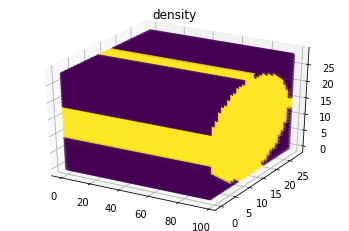

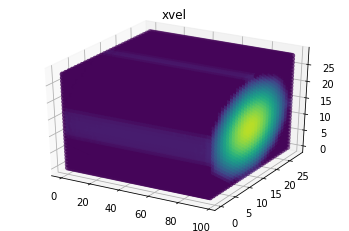

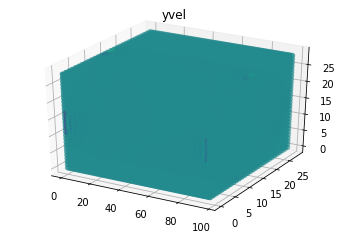

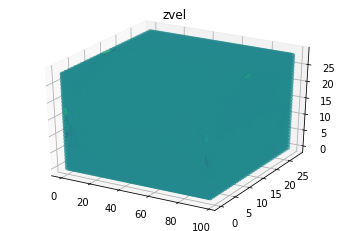

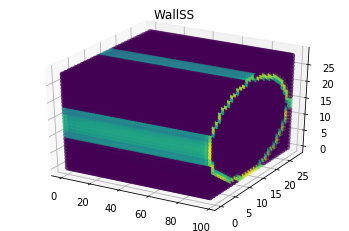

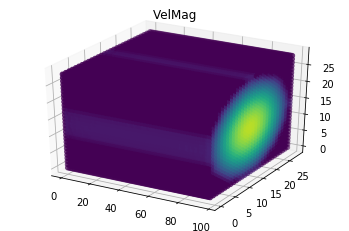

In [10]:
# Visualization
numcoordinates = len(alt_input) * len(alt_input[0]) * len(alt_input[0][0])
xcoordinates = np.zeros(numcoordinates)
ycoordinates = np.zeros(numcoordinates)
zcoordinates = np.zeros(numcoordinates)
channelvals = np.zeros((numcoordinates,6))
variable = {"density": 3, "xvel": 4, "yvel": 5, "zvel": 6, "WallSS": 7, "VelMag": 8} # "xpos": 0, "ypos": 1, "zpos": 2, 


counter = 0
for l in range(len(alt_input)):
    for w in range(len(alt_input[0])):
        for h in range(len(alt_input[0][0])):
            xcoordinates[counter] = l
            ycoordinates[counter] = w
            zcoordinates[counter] = h
            channelvals[counter] = alt_input[l, w, h,:]
            counter += 1
            
for key,val in variable.items():
    plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(xcoordinates, ycoordinates, zcoordinates, c=channelvals[:,val-3])
    plt.title('{}'.format(key))
plt.show()